### Linear Regression with possible modes of 'NE' (normal equation, exact solution), 'GD' (gradient descent) ,
### 'GDM' (GD with momentum), 'SGD' (stochastic GD) and 'SGDM' (SGD with momentum)  

In [1]:
import numpy as np

In [2]:
class LinearRegression():
        def __init__(self, mode = "NE", learn_rate = 0.01, max_iter = 1000, beta = 0.9, tolerance = 1e-4):
            if mode not in ["NE", "GD", "GDM", "SGD", "SGDM"]:
                raise ValueError(mode + " is not a valid choice.")
            self.mode = mode
            # parameters
            self.Theta = None
            # learning rate for GD 
            self.learn_rate = learn_rate
            # number of max iterations in GD
            self.max_iter = max_iter
            # optimizing with momentum 
            self.beta = beta
            self.z = None
            # the minimum value of norm(grad)
            self.tolerance = tolerance
        
            
        def fit(self, X, Y):
            X_1 = np.c_[np.ones(X.shape[0]), X]
            
            # The exact solution
            if self.mode == "NE":
                self.Theta = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T.dot(Y))
                return True
            
            # Gradient Descent
            elif self.mode == "GD":
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                for i in range(self.max_iter):
                    # check that gradient is not too small value
                    if np.linalg.norm(grad) > self.tolerance:
                        self.Theta -= self.learn_rate*grad
                        grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                return True
            
            # Gradient Descent with Momentum
            elif self.mode == "GDM":
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                    self.z = np.zeros_like(self.Theta)
                grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                for i in range(self.max_iter):
                    # check that gradient is not too small value
                    if np.linalg.norm(grad) > self.tolerance:
                        # momentum optimization
                        self.z = self.beta*self.z + grad
                        self.Theta -= self.learn_rate*self.z
                        grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
            
            # Stochastic Gradient Descent
            elif self.mode == "SGD":
                print("SGD")
                return True
            
            # Stochastic Gradient Descent with Momentum
            elif self.mode == "SGDM":
                print("SGDM")
                return True
            
        def predict(self, X):
            if self.Theta is None:
                return False
            else:
                X_1 = np.c_[np.ones(X.shape[0]), X]
                return X_1.dot(self.Theta)

### Examples

### Simple data set

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_ = np.array(10 * np.random.rand(50))
y_ = 2 * x_ - 5 + np.random.randn(50)
x = x_.reshape(50, 1)
y = y_.reshape(50, 1)
print(x.shape, y.shape)

(50, 1) (50, 1)


In [5]:
simple_modelNE = LinearRegression(mode="NE")
simple_modelNE.fit(x, y)
y_predNE = simple_modelNE.predict(x)
simple_modelNE.Theta

array([[-4.87285869],
       [ 1.97636405]])

In [6]:
simple_modelGD = LinearRegression(mode="GD", max_iter=1000)
simple_modelGD.fit(x, y)
y_predGD = simple_modelGD.predict(x)
simple_modelGD.Theta

array([[-4.68702444],
       [ 1.94842389]])

In [7]:
simple_modelGDM = LinearRegression(mode="GDM", max_iter=100)
simple_modelGDM.fit(x, y)
y_predGDM = simple_modelGDM.predict(x)
simple_modelGDM.Theta

array([[-4.87245974],
       [ 1.97292073]])

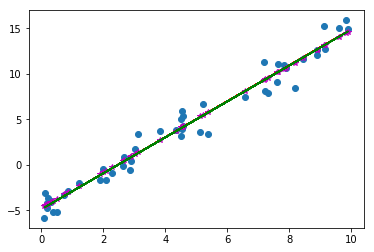

In [8]:
plt.scatter(x, y)
plt.plot(x, y_predNE, "r-")
plt.plot(x, y_predGD, "m*")
plt.plot(x, y_predGDM, "g-")

### Data set with more features

In [9]:
%%time
X = np.random.rand(500, 10)
X_1 = np.c_[np.ones(X.shape[0]), X]
Theta_1 = np.array([[-5,10,2,7,4.5,0.1,0.01,-1,1,3,0]])
Err = np.random.normal(0, 0.1, size=(X_1.shape[0], 1)) 
Y = X_1.dot(Theta_1.T) + Err

Wall time: 0 ns


In [10]:
%%time
modelNE = LinearRegression(mode="NE")
modelNE.fit(X, Y)
for i in range(modelNE.Theta.shape[0]):
    print(modelNE.Theta[i], '-->', Theta_1.T[i])

[-4.97790855] --> [-5.]
[ 10.00923109] --> [ 10.]
[ 2.00780211] --> [ 2.]
[ 6.98563707] --> [ 7.]
[ 4.496534] --> [ 4.5]
[ 0.08755925] --> [ 0.1]
[ 0.02408392] --> [ 0.01]
[-1.01585253] --> [-1.]
[ 0.99256776] --> [ 1.]
[ 2.98067953] --> [ 3.]
[-0.00356715] --> [ 0.]
Wall time: 10 ms


In [11]:
%%time
modelGD = LinearRegression(mode="GD", max_iter=30000)
modelGD.fit(X, Y)
for i in range(modelGD.Theta.shape[0]):
    print(modelGD.Theta[i], '-->', Theta_1.T[i])

[-4.97363416] --> [-5.]
[ 10.00840108] --> [ 10.]
[ 2.00697499] --> [ 2.]
[ 6.98479603] --> [ 7.]
[ 4.49588653] --> [ 4.5]
[ 0.08663234] --> [ 0.1]
[ 0.02331177] --> [ 0.01]
[-1.01667252] --> [-1.]
[ 0.99158078] --> [ 1.]
[ 2.97972691] --> [ 3.]
[-0.00440843] --> [ 0.]
Wall time: 760 ms


In [12]:
%%time
modelGDM = LinearRegression(mode="GDM", max_iter=3000)
modelGDM.fit(X, Y)
for i in range(modelGDM.Theta.shape[0]):
    print(modelGDM.Theta[i], '-->', Theta_1.T[i])

[-4.97426253] --> [-5.]
[ 10.0085231] --> [ 10.]
[ 2.00709658] --> [ 2.]
[ 6.98491967] --> [ 7.]
[ 4.49598171] --> [ 4.5]
[ 0.0867686] --> [ 0.1]
[ 0.02342528] --> [ 0.01]
[-1.01655197] --> [-1.]
[ 0.99172588] --> [ 1.]
[ 2.97986696] --> [ 3.]
[-0.00428475] --> [ 0.]
Wall time: 90 ms
